In [1]:
import numpy as np
import pandas as pd

In [2]:
# read dataframes
train_df = pd.read_csv('LIAR-PLUS/dataset/train2.tsv', sep='\t', header=None)
val_df = pd.read_csv('LIAR-PLUS/dataset/val2.tsv', sep='\t', header=None)
test_df = pd.read_csv('LIAR-PLUS/dataset/test2.tsv', sep='\t', header=None)

In [3]:
# drop the first column which is just the indexes
train_df.drop([0], axis=1, inplace=True)
val_df.drop([0], axis=1, inplace=True)
test_df.drop([0], axis=1, inplace=True)

In [4]:
# change column names
column_names = ['id', 'label', 'statement', 'subjects', 'speaker',
                'speaker_job_title', 'state', 'party',
                'barely_true_counts', 'false_counts', 'half_true_counts',
                'mostly_true_counts', 'pants_fire_counts', 'context',
                'justification']

train_df.columns = column_names
val_df.columns = column_names
test_df.columns = column_names

In [5]:
# view each row vertically
train_df.head(3).T

,0,1,2
id,2635.json,10540.json,324.json
label,false,half-true,mostly-true
statement,Says the Annies List political group supports ...,When did the decline of coal start? It started...,"Hillary Clinton agrees with John McCain ""by vo..."
subjects,abortion,"energy,history,job-accomplishments",foreign-policy
speaker,dwayne-bohac,scott-surovell,barack-obama
speaker_job_title,State representative,State delegate,President
state,Texas,Virginia,Illinois
party,republican,democrat,democrat
barely_true_counts,0,0,70
false_counts,1,0,71


In [6]:
# split labels for binarising 
unique_labels = set(train_df['label'].unique())
true_labels = set(['true', 'mostly-true', 'half-true'])
false_labels = set.difference(unique_labels, true_labels)

print(unique_labels, true_labels, false_labels)

{'true', 'mostly-true', 'false', 'half-true', 'barely-true', 'pants-fire'} {'half-true', 'true', 'mostly-true'} {'barely-true', 'false', 'pants-fire'}


In [7]:
def binarise_label(label):
    if label in true_labels:
        return True
    else:
        return False
updated_column_names = column_names[:2] + ['binary_label'] + column_names[2:]

train_df['binary_label'] = train_df['label'].map(binarise_label)
val_df['binary_label'] = val_df['label'].map(binarise_label)
test_df['binary_label'] = test_df['label'].map(binarise_label)

train_df = train_df.reindex(columns=updated_column_names)
val_df = val_df.reindex(columns=updated_column_names)
test_df = test_df.reindex(columns=updated_column_names)

In [8]:
train_df.head(2)

,id,label,binary_label,statement,subjects,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_fire_counts,context,justification
0,2635.json,false,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540.json,half-true,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."


In [9]:
# lets merge all the dfs for eda on the whole set
merged_df = train_df.append(val_df).append(test_df)

print('merged_df shape :',merged_df.shape)
print('train_df shape  :',train_df.shape)
print('val_df shape    :',val_df.shape)
print('test_df shape   :',test_df.shape)


merged_df shape : (12791, 16)
train_df shape  : (10240, 16)
val_df shape    : (1284, 16)
test_df shape   : (1267, 16)


In [10]:
#lowercase all the columns in df
merged_df = merged_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
train_df = train_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x) 
val_df = val_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
test_df = test_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x) 

In [11]:
# check for null values
print(merged_df.isnull().sum())
print()
print(train_df.isnull().sum())
print()
print(val_df.isnull().sum())
print()
print(test_df.isnull().sum())

id                       0
label                    0
binary_label             0
statement                0
subjects                 2
speaker                  2
speaker_job_title     3567
state                 2749
party                    2
barely_true_counts       2
false_counts             2
half_true_counts         2
mostly_true_counts       2
pants_fire_counts        2
context                131
justification           97
dtype: int64

id                       0
label                    0
binary_label             0
statement                0
subjects                 2
speaker                  2
speaker_job_title     2897
state                 2208
party                    2
barely_true_counts       2
false_counts             2
half_true_counts         2
mostly_true_counts       2
pants_fire_counts        2
context                102
justification           84
dtype: int64

id                      0
label                   0
binary_label            0
statement               0
subj

In [12]:
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
merged_df[merged_df.isna().any(axis=1)].head()

,id,label,binary_label,statement,subjects,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_fire_counts,context,justification
3,1123.json,false,False,health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,the release may have a point that mikulskis co...
4,9028.json,half-true,True,the economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on cnn,"crist said that the economic ""turnaround start..."
6,2342.json,barely-true,False,jim dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,but determining that would take significant de...
8,5602.json,half-true,True,"however, it took $19.5 million in oregon lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,but johnson is correct that many other factors...
12,5947.json,false,False,when mitt romney was governor of massachusetts...,"history,state-budget",mitt-romney,former governor,massachusetts,republican,34.0,32.0,58.0,33.0,19.0,an interview with cbn news,NaN


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_distribution(df, column_name, order, axis, title_prefix=''):
    
    sns.countplot(x=column_name, data=df, order=order, palette='hls', ax=axis)
    axis.title.set_text(title_prefix + f' data {column_name} distribution')

def plot_distribution_for_all_dfs(column_name):

    f, axes = plt.subplots(2, 2, figsize=(12, 7))
    order = list(merged_df[column_name].unique())
    plot_distribution(merged_df, column_name, order, axes[0,0], 'Whole')
    plot_distribution(train_df, column_name, order, axes[0,1], 'Train')
    plot_distribution(val_df, column_name, order, axes[1,0], 'Validation')
    plot_distribution(test_df, column_name, order, axes[1,1], 'Test')
    f.suptitle(column_name + ' Distributions')
    f.tight_layout()


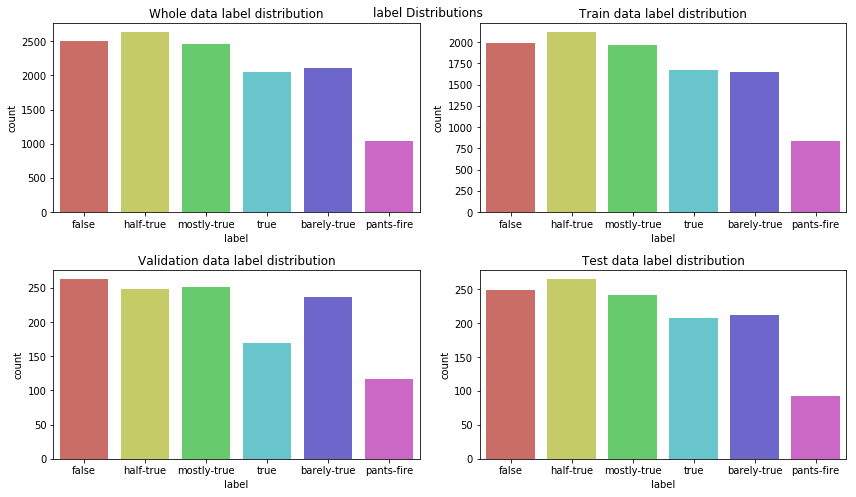

In [14]:
plot_distribution_for_all_dfs('label')

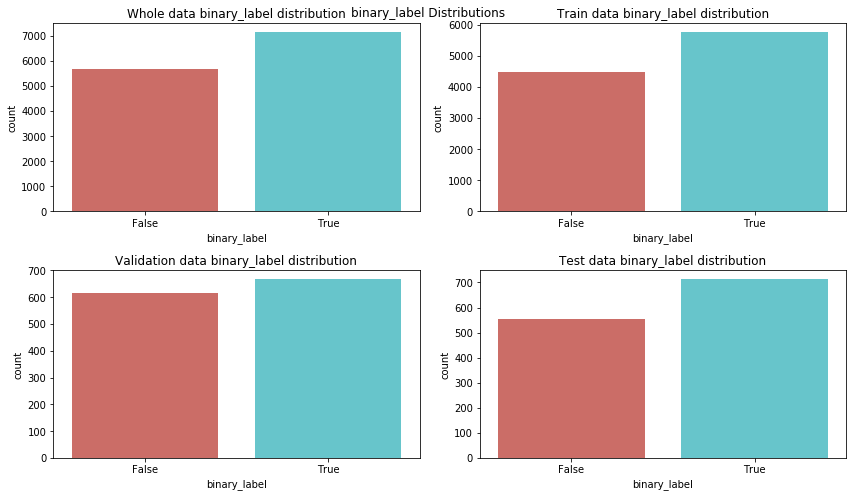

In [15]:
plot_distribution_for_all_dfs('binary_label')

In [16]:
merged_df.head()

,id,label,binary_label,statement,subjects,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_fire_counts,context,justification
0,2635.json,false,False,says the annies list political group supports ...,abortion,dwayne-bohac,state representative,texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,that's a premise that he fails to back up. ann...
1,10540.json,half-true,True,when did the decline of coal start? it started...,"energy,history,job-accomplishments",scott-surovell,state delegate,virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"surovell said the decline of coal ""started whe..."
2,324.json,mostly-true,True,"hillary clinton agrees with john mccain ""by vo...",foreign-policy,barack-obama,president,illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver,obama said he would have voted against the ame...
3,1123.json,false,False,health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,the release may have a point that mikulskis co...
4,9028.json,half-true,True,the economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on cnn,"crist said that the economic ""turnaround start..."


In [17]:
# https://github.com/ExploringLies/lies-have-short-legs/blob/master/notebooks/BiasEstimation.ipynb
def group_and_count(df, groupby_column, with_pct=False, with_avg=False):
    result = df.groupby(groupby_column).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
    if with_pct:
        result['count_pct'] = result['count'] / result['count'].sum()
    if with_avg:
        result['count_avg'] = result['count'].mean()
    return result

def convert_column_to_str_type(df, column_name):
    return df[column_name].astype('str')

def display_unique_subjects(df, prefix=''):
    subjects = []
    _df = df.copy()
    _df['subjects'] = convert_column_to_str_type(_df, 'subjects')
    for subject_list in _df['subjects'].map(lambda x: x.split(',')).values:
        subjects.extend(subject_list)
    print(f'Number of unique subjects in {prefix} dataset is {len(np.unique(subjects))}')

# https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe
def dfListExplode(df, explodeKeys):
    if not isinstance(explodeKeys, list):
        explodeKeys=[explodeKeys]
    # recursive handling of explodeKeys
    if len(explodeKeys)==0:
        return df
    elif len(explodeKeys)==1:
        explodeKey=explodeKeys[0]
    else:
        return dfListExplode( dfListExplode(df, explodeKeys[:1]), explodeKeys[1:])
    # perform explosion/unnesting for key: explodeKey
    dfPrep=df[explodeKey].apply(lambda x: x if isinstance(x,list) else [x]) #casts all elements to a list
    dfIndExpl=pd.DataFrame([[x] + [z] for x, y in zip(dfPrep.index,dfPrep.values) for z in y ], columns=['explodedIndex',explodeKey])
    dfMerged=dfIndExpl.merge(df.drop(explodeKey, axis=1), left_on='explodedIndex', right_index=True)
    dfReind=dfMerged.reindex(columns=list(df))
    return dfReind


In [18]:
# num unique before simplifying subjects
print(merged_df['subjects'].nunique())
print(train_df['subjects'].nunique())
print(val_df['subjects'].nunique())
print(test_df['subjects'].nunique())


display_unique_subjects(merged_df, 'whole')
display_unique_subjects(train_df, 'train')
display_unique_subjects(val_df, 'val')
display_unique_subjects(test_df, 'test')

4534
3827
734
732
Number of unique subjects in whole dataset is 145
Number of unique subjects in train dataset is 143
Number of unique subjects in val dataset is 132
Number of unique subjects in test dataset is 134


In [19]:
merged_df['subject_list'] = merged_df['subjects'].str.split(',')
train_df['subject_list'] = train_df['subjects'].str.split(',')
val_df['subject_list'] = val_df['subjects'].str.split(',')
test_df['subject_list'] = test_df['subjects'].str.split(',')


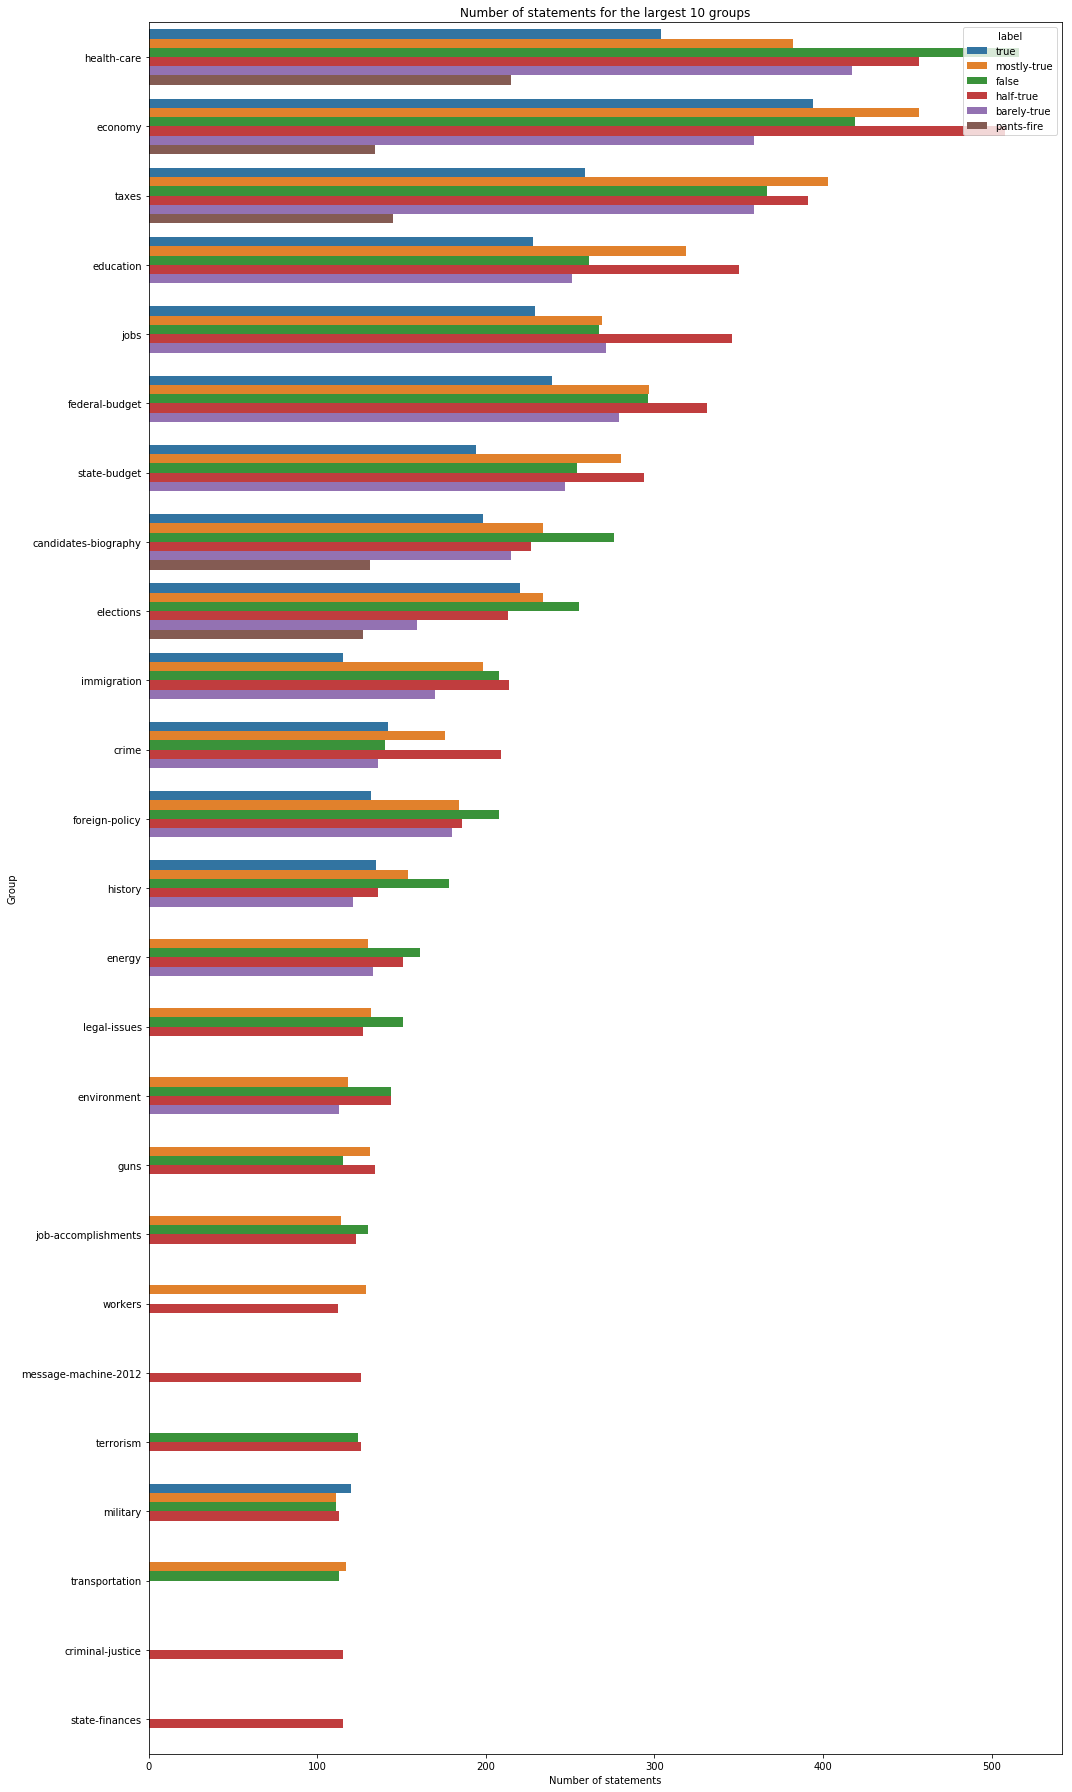

In [20]:
m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 25))
sns.barplot(data=group_and_count(m, ['subject_list', 'label'])[:100],
                                 y='subject_list', x='count',
                                 hue='label', hue_order=unique_labels)
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



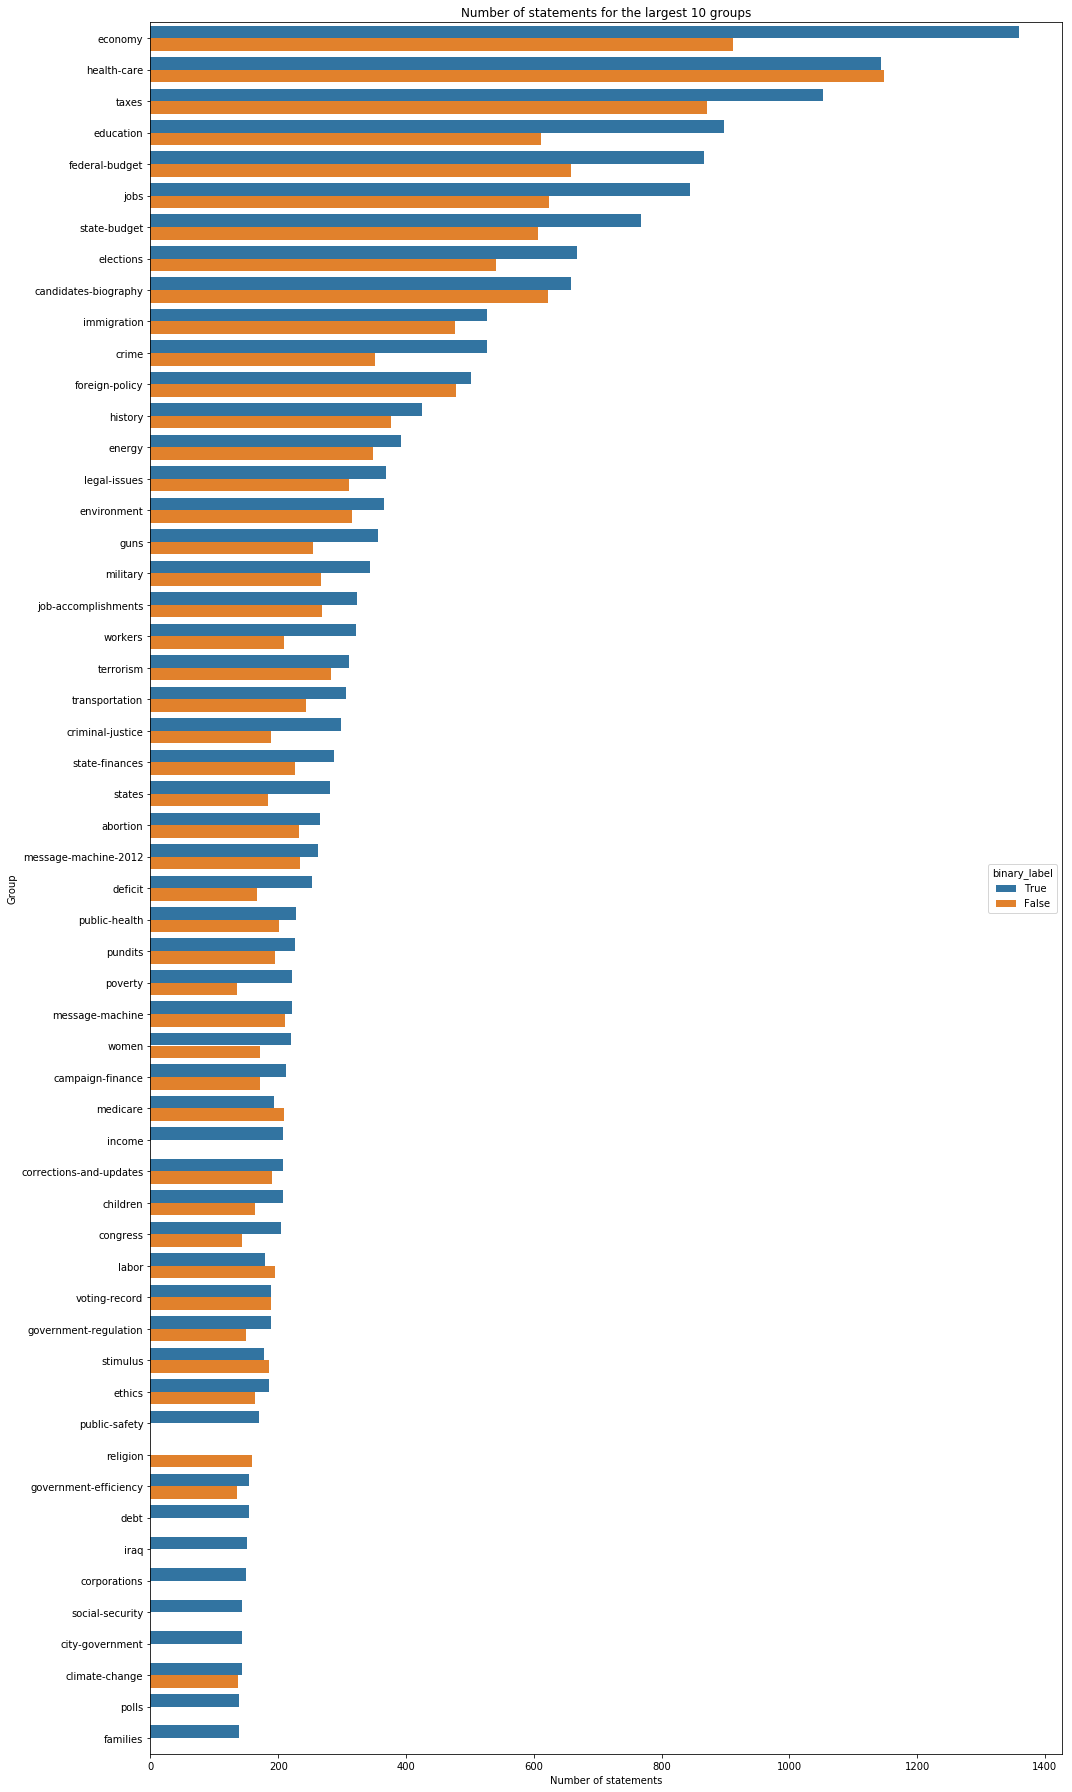

In [21]:
m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 25))
sns.barplot(data=group_and_count(m, ['subject_list', 'binary_label'])[:100],
                                 y='subject_list', x='count',
                                 hue='binary_label', hue_order=[True, False])
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



In [22]:
merged_df.columns

Index(['id', 'label', 'binary_label', 'statement', 'subjects', 'speaker',
       'speaker_job_title', 'state', 'party', 'barely_true_counts',
       'false_counts', 'half_true_counts', 'mostly_true_counts',
       'pants_fire_counts', 'context', 'justification', 'subject_list'],
      dtype='object')

In [23]:
print(merged_df['speaker'].nunique())
print(train_df['speaker'].nunique())
print(val_df['speaker'].nunique())
print(test_df['speaker'].nunique())
merged_df['speaker'].value_counts()

3309
2910
662
636


barack-obama                                   611
donald-trump                                   343
hillary-clinton                                297
mitt-romney                                    212
john-mccain                                    189
scott-walker                                   183
chain-email                                    178
rick-perry                                     173
marco-rubio                                    153
rick-scott                                     150
ted-cruz                                       118
bernie-s                                       106
chris-christie                                 104
facebook-posts                                 100
charlie-crist                                   90
newt-gingrich                                   83
blog-posting                                    81
jeb-bush                                        79
joe-biden                                       76
paul-ryan                      

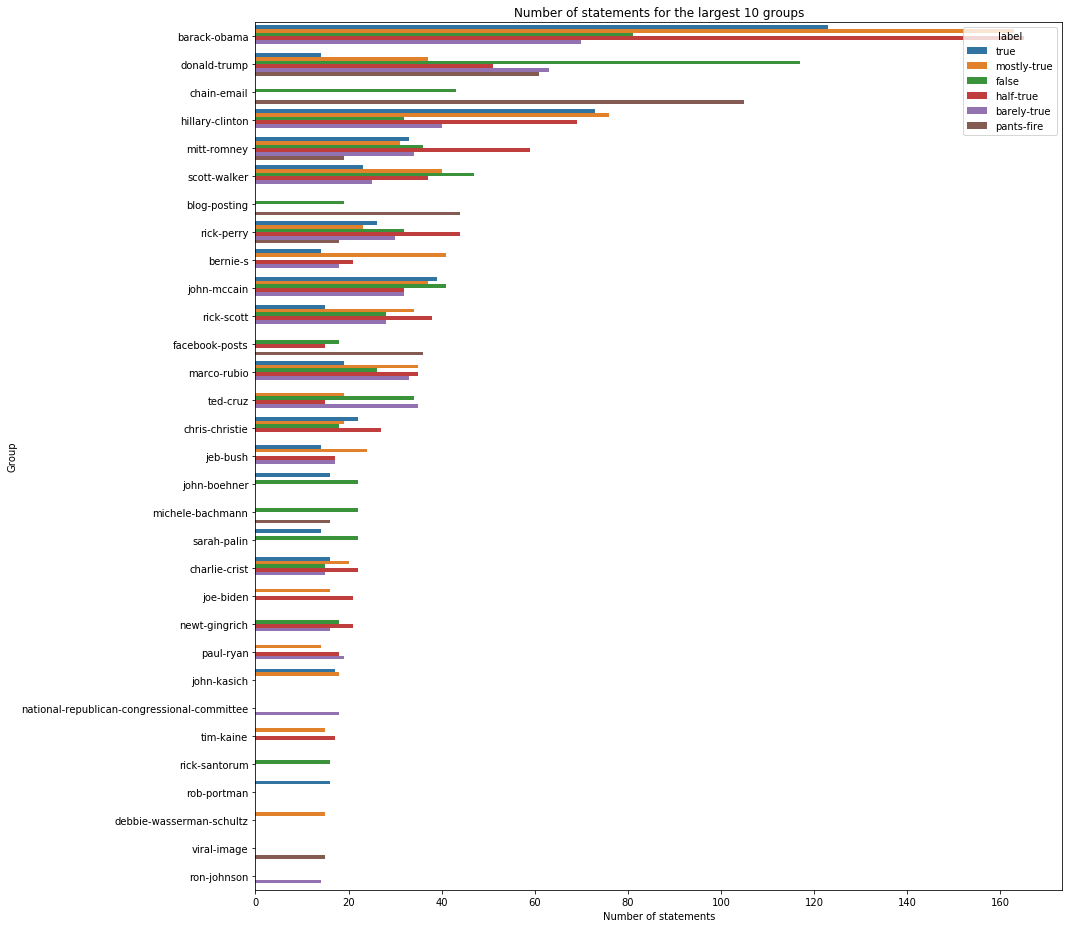

In [24]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 13))
sns.barplot(data=group_and_count(merged_df, ['speaker', 'label'])[:100],
                                 y='speaker', x='count',
                                 hue='label', hue_order=list(unique_labels))
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



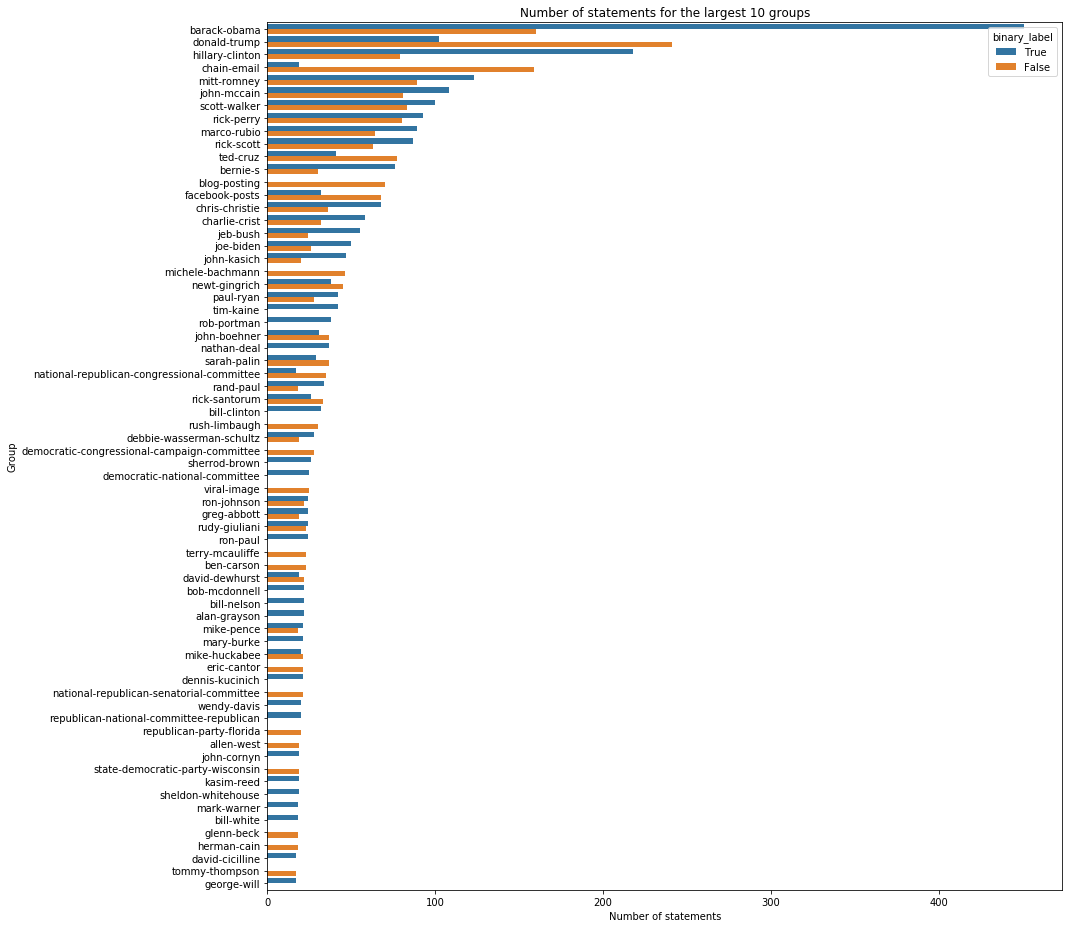

In [25]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 13))
sns.barplot(data=group_and_count(merged_df, ['speaker', 'binary_label'])[:100],
                                 y='speaker', x='count',
                                 hue='binary_label', hue_order=[True, False])
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



In [26]:
print(merged_df['speaker_job_title'].nunique())
print(train_df['speaker_job_title'].nunique())
print(val_df['speaker_job_title'].nunique())
print(test_df['speaker_job_title'].nunique())

1278
1117
288
285


In [27]:
merged_df['speaker_job_title'].value_counts().head(25)

u.s. senator                               923
president                                  615
governor                                   537
president-elect                            343
u.s. representative                        340
presidential candidate                     315
state senator                              253
state representative                       224
former governor                            213
senator                                    194
milwaukee county executive                 183
attorney                                   128
u.s. house of representatives              118
congressman                                109
governor of new jersey                     104
social media posting                       100
co-host on cnn's "crossfire"                88
u.s. congressman                            82
speaker of the house of representatives     72
congresswoman                               69
governor of ohio as of jan. 10, 2011        67
lawyer       

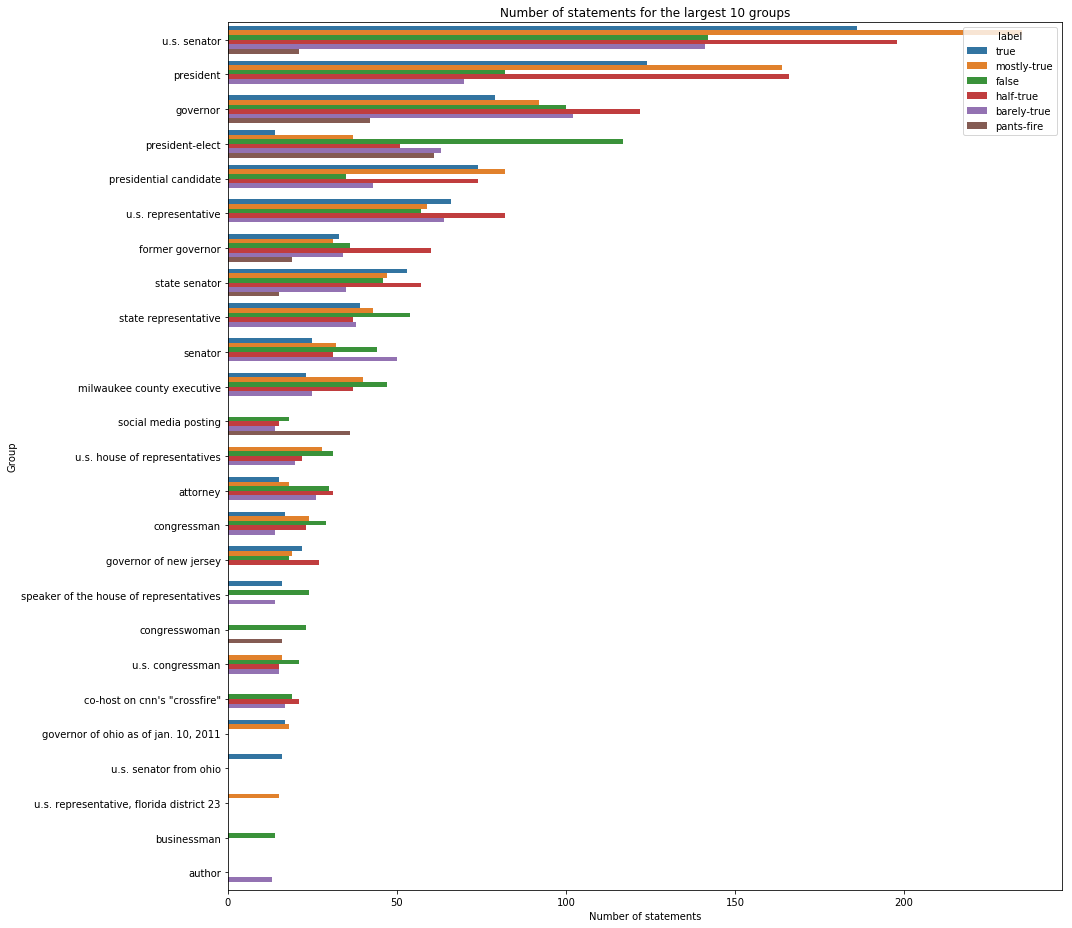

In [28]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 13))
sns.barplot(data=group_and_count(merged_df, ['speaker_job_title', 'label'])[:100],
                                 y='speaker_job_title', x='count',
                                 hue='label', hue_order=list(unique_labels))
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



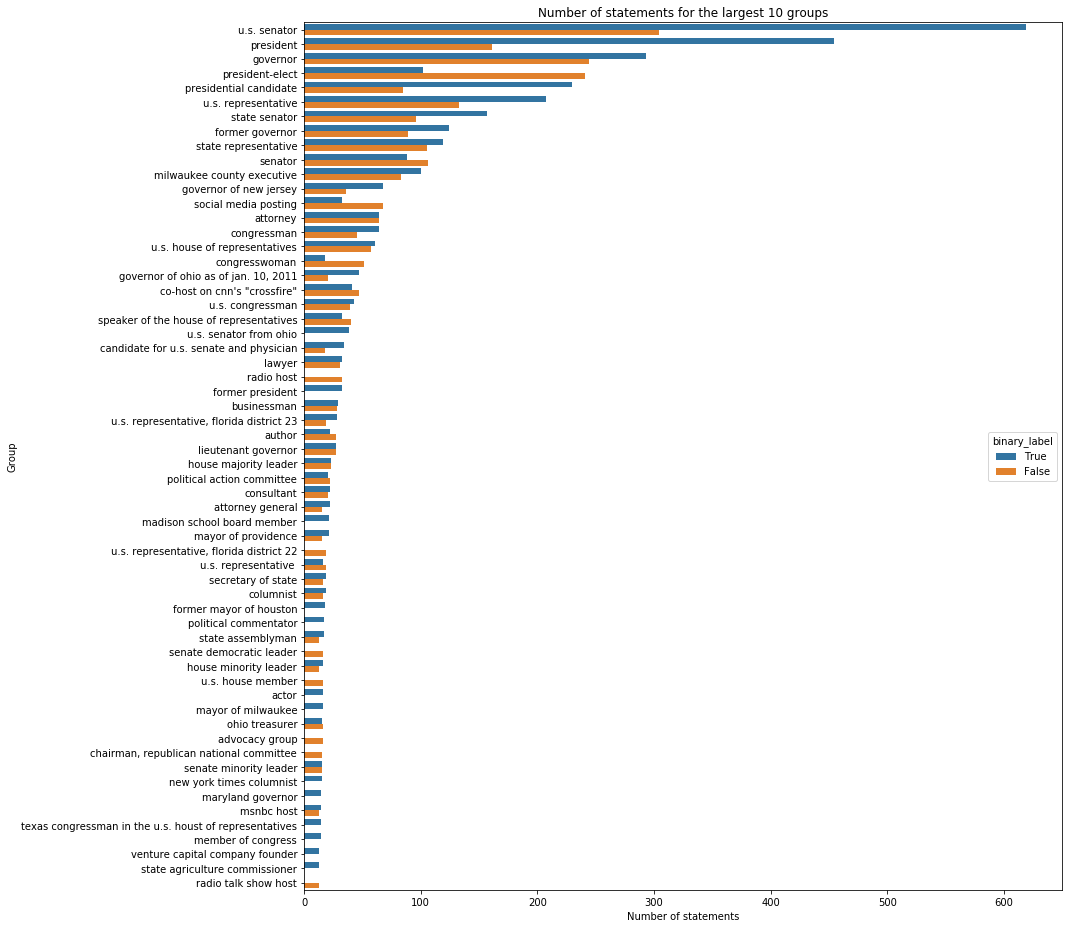

In [29]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 13))
sns.barplot(data=group_and_count(merged_df, ['speaker_job_title', 'binary_label'])[:100],
                                 y='speaker_job_title', x='count',
                                 hue='binary_label', hue_order=[True, False])
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



In [30]:
merged_df.columns

Index(['id', 'label', 'binary_label', 'statement', 'subjects', 'speaker',
       'speaker_job_title', 'state', 'party', 'barely_true_counts',
       'false_counts', 'half_true_counts', 'mostly_true_counts',
       'pants_fire_counts', 'context', 'justification', 'subject_list'],
      dtype='object')

In [31]:
print(merged_df['party'].nunique())
print(train_df['party'].nunique())
print(val_df['party'].nunique())
print(test_df['party'].nunique())
print(merged_df['party'].value_counts())

24
23
16
16
republican                      5665
democrat                        4137
none                            2181
organization                     264
independent                      180
newsmaker                         64
libertarian                       51
journalist                        49
activist                          45
columnist                         44
talk-show-host                    32
state-official                    24
labor-leader                      15
business-leader                   11
tea-party-member                  10
education-official                 3
constitution-party                 3
green                              3
county-commissioner                2
government-body                    2
democratic-farmer-labor            1
ocean-state-tea-party-action       1
moderate                           1
liberal-party-canada               1
Name: party, dtype: int64


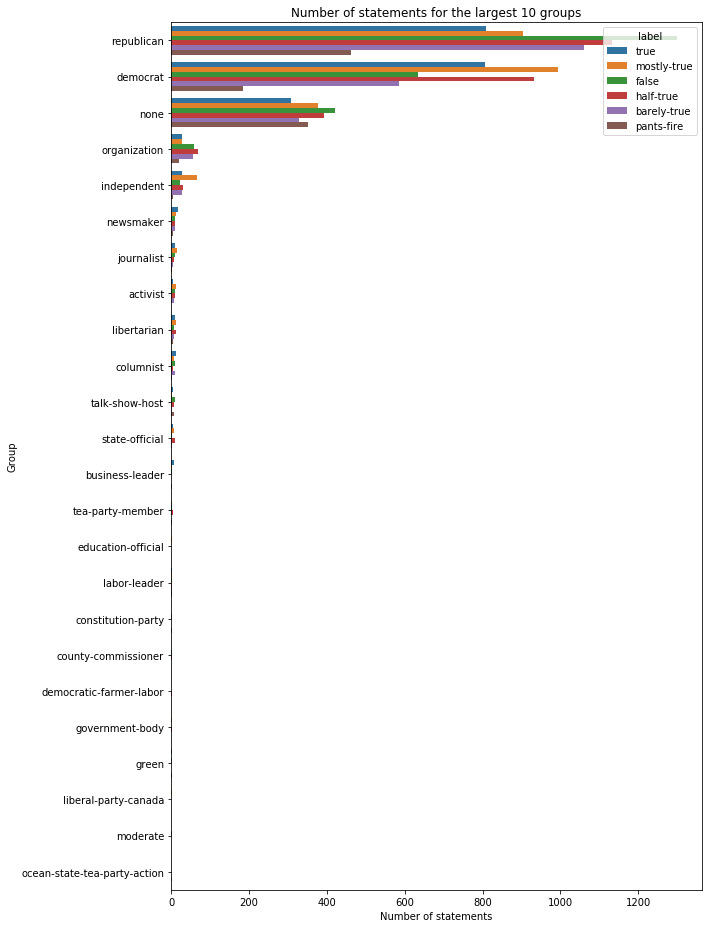

In [32]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(10, 13))
sns.barplot(data=group_and_count(merged_df, ['party', 'label'])[:250],
                                 y='party', x='count',
                                 hue='label', hue_order=list(unique_labels))
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



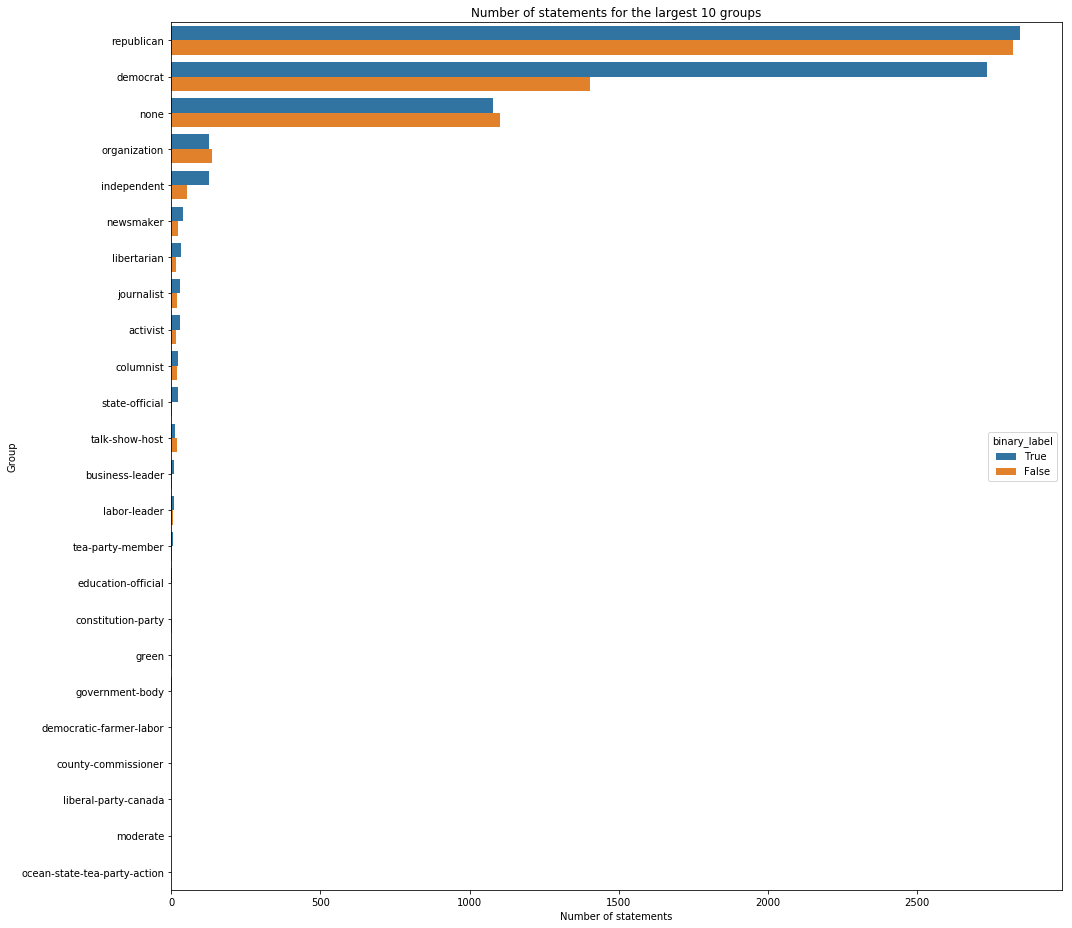

In [33]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 13))
sns.barplot(data=group_and_count(merged_df, ['party', 'binary_label']),
                                 y='party', x='count',
                                 hue='binary_label', hue_order=[True, False])
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



In [34]:
print(merged_df['state'].nunique())
print(train_df['state'].nunique())
print(val_df['state'].nunique())
print(test_df['state'].nunique())
print(merged_df['state'].value_counts())

83
82
47
49
texas                                                1260
florida                                              1231
wisconsin                                             900
new york                                              829
illinois                                              692
ohio                                                  589
georgia                                               545
virginia                                              512
rhode island                                          453
oregon                                                307
new jersey                                            305
massachusetts                                         250
arizona                                               228
california                                            180
washington, d.c.                                      141
vermont                                               117
pennsylvania                                          112
ne

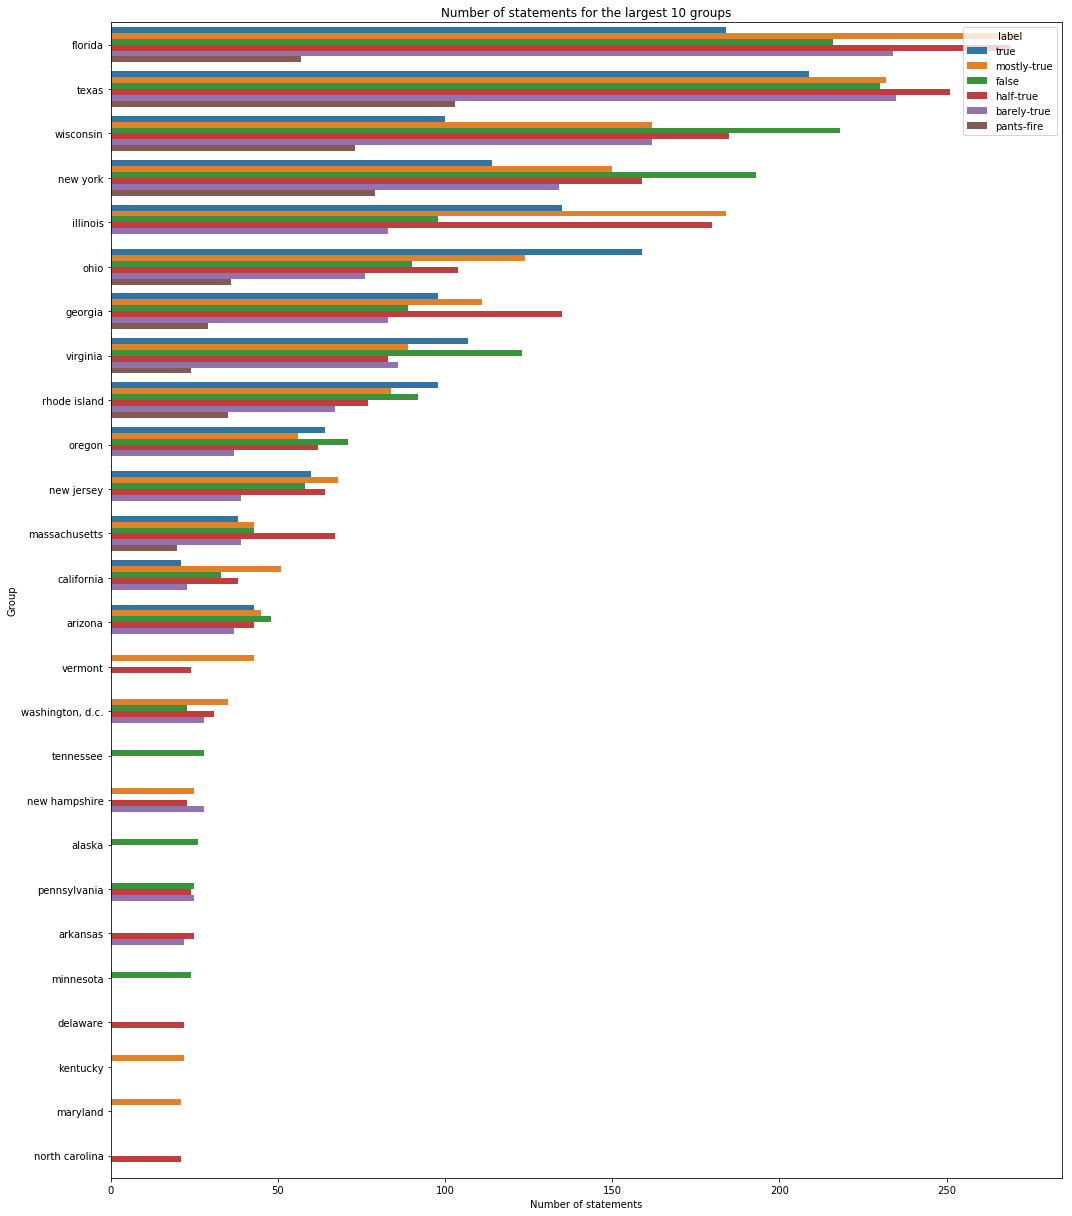

In [35]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 17))
sns.barplot(data=group_and_count(merged_df, ['state', 'label'])[:100],
                                 y='state', x='count',
                                 hue='label', hue_order=list(unique_labels))
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



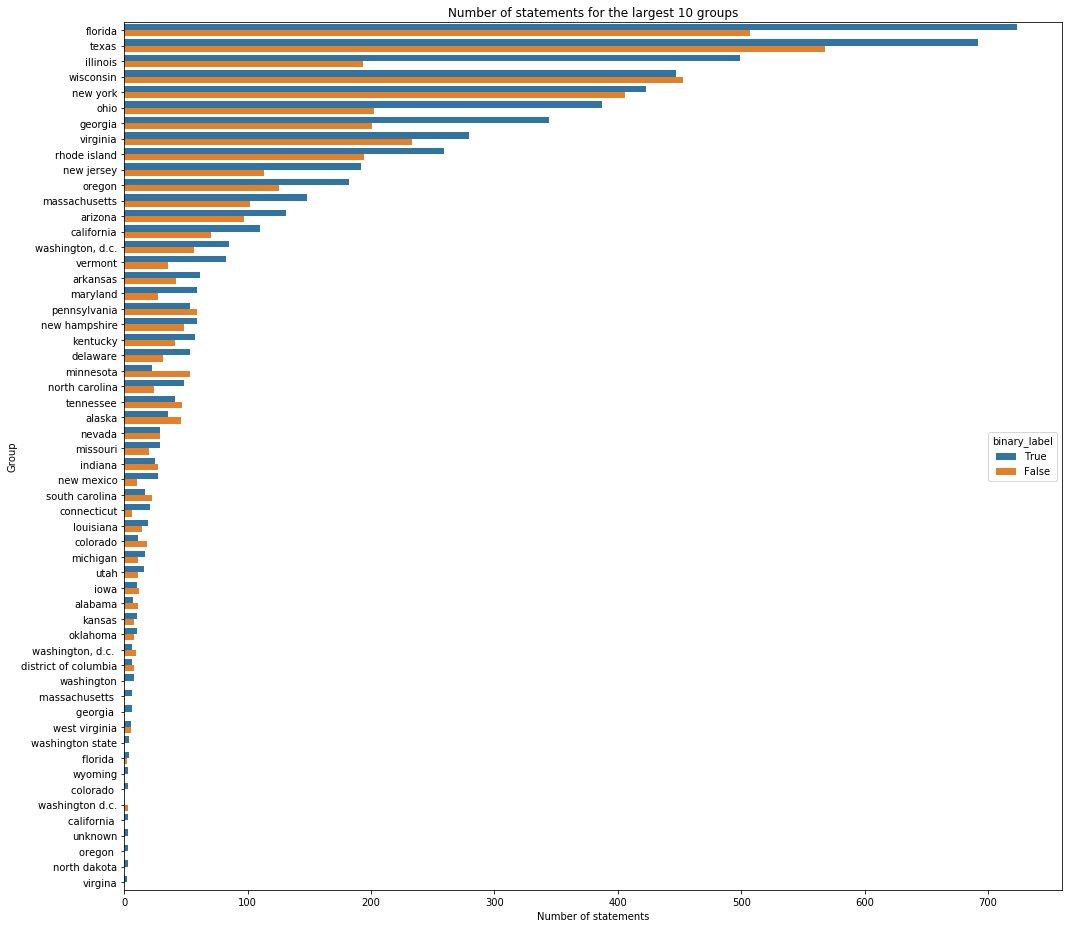

In [36]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 13))
sns.barplot(data=group_and_count(merged_df, ['state', 'binary_label'])[:100],
                                 y='state', x='count',
                                 hue='binary_label', hue_order=[True, False])
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



In [37]:
print(merged_df['context'].nunique())
print(train_df['context'].nunique())
print(val_df['context'].nunique())
print(test_df['context'].nunique())
print(merged_df['context'].value_counts())

5074
4291
788
787
a news release                                                                   310
an interview                                                                     286
a press release                                                                  282
a speech                                                                         259
a tv ad                                                                          223
a tweet                                                                          199
a campaign ad                                                                    165
a television ad                                                                  161
a radio interview                                                                126
a debate                                                                         114
a news conference                                                                107
a campaign commercial                          

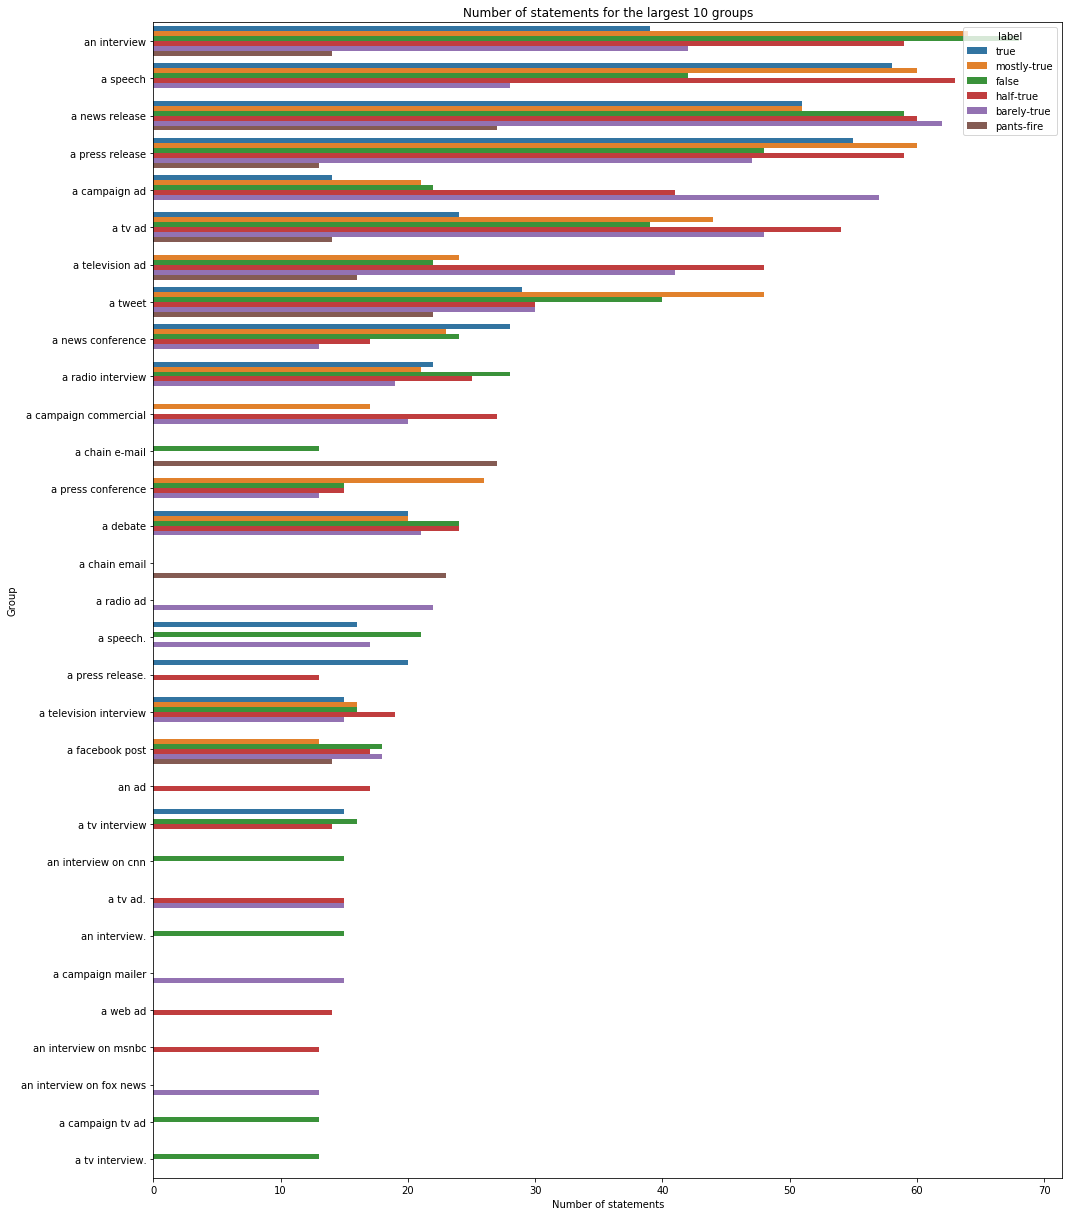

In [38]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 17))
sns.barplot(data=group_and_count(merged_df, ['context', 'label'])[:100],
                                 y='context', x='count',
                                 hue='label', hue_order=list(unique_labels))
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



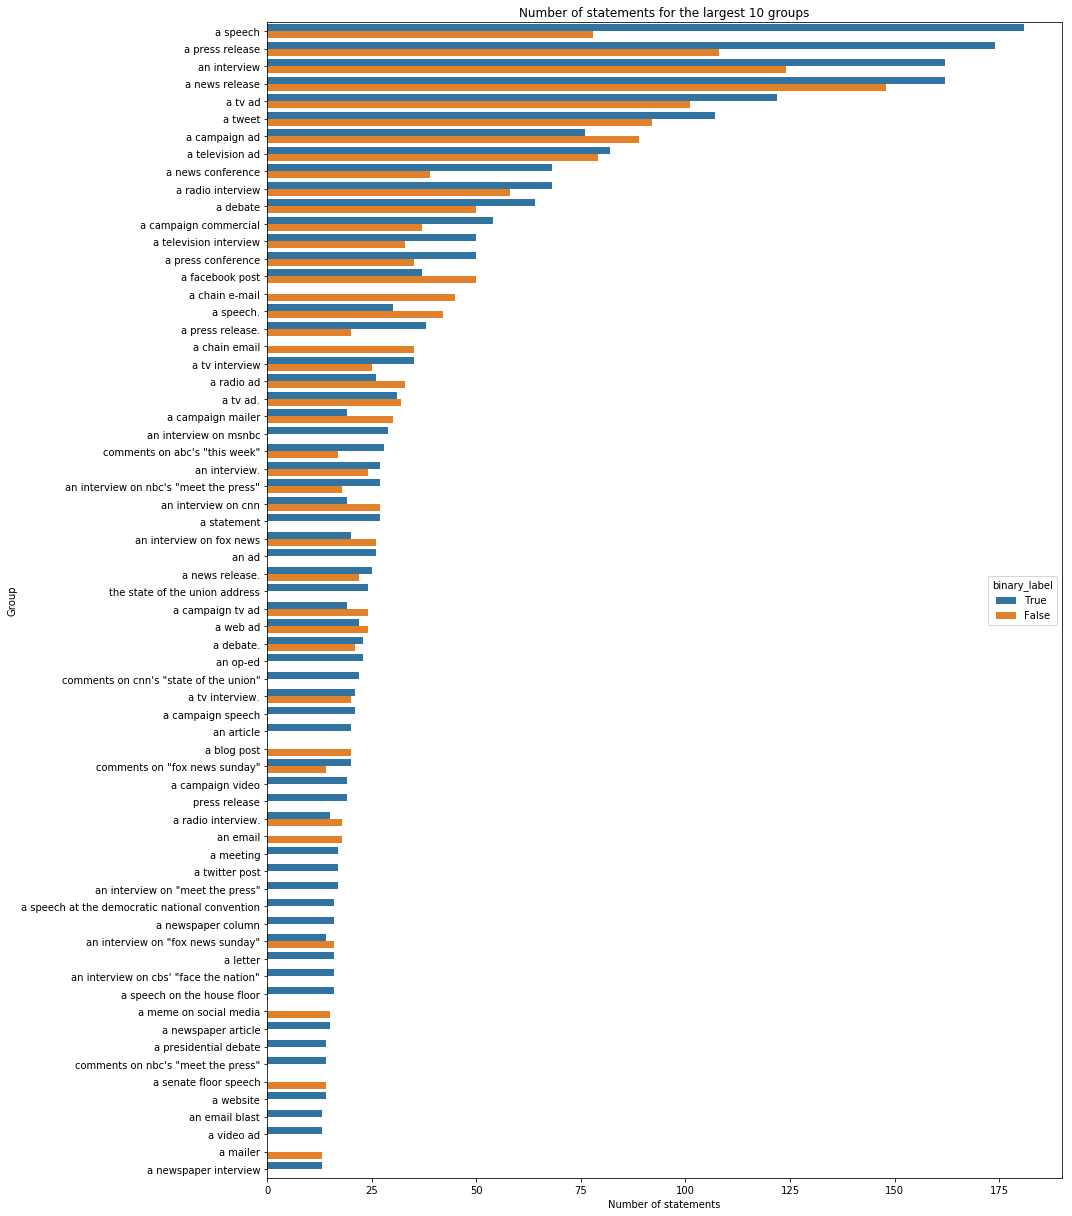

In [39]:
# m = dfListExplode(merged_df, 'subject_list')
plt.figure(figsize=(15, 17))
sns.barplot(data=group_and_count(merged_df, ['context', 'binary_label'])[:100],
                                 y='context', x='count',
                                 hue='binary_label', hue_order=[True, False])
plt.xlabel('Number of statements')
plt.ylabel('Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()



In [40]:
list(merged_df.columns)

['id',
 'label',
 'binary_label',
 'statement',
 'subjects',
 'speaker',
 'speaker_job_title',
 'state',
 'party',
 'barely_true_counts',
 'false_counts',
 'half_true_counts',
 'mostly_true_counts',
 'pants_fire_counts',
 'context',
 'justification',
 'subject_list']

In [41]:
def categorical_to_ids(df, column_name, max_id):
    if column_name + '_id' in list(df.columns):
        return df
    
    def subject_list_map(subject_str):
        subject_ids = [0] * max_id
        subject_list = subject_str.split(',')
        for subject in subject_list:
            if subject in column_top_values:
                subject_ids[column_value_to_dict[subject]] = 1
        return subject_ids
    def column_map(value):
        if value in column_top_values:
            return column_value_to_dict[value]
        else:
            return len(column_value_to_dict)
        

    if column_name == 'subject_list':
        _merged_df = m
    else:
        _merged_df = merged_df

    column_top_values = list(_merged_df[column_name].value_counts()[:max_id].keys())
    column_value_to_dict = {k: v for v, k in enumerate(column_top_values)}

    if column_name == 'subject_list':
            
        df[column_name + '_id'] = df['subjects'].astype(str).map(subject_list_map)
    else:
        df[column_name + '_id'] = df[column_name].map(column_map)
    return df

In [42]:
train_df = categorical_to_ids(train_df, 'subject_list', 20)
val_df = categorical_to_ids(val_df, 'subject_list', 20)
test_df = categorical_to_ids(test_df, 'subject_list', 20)

In [43]:
train_df = categorical_to_ids(train_df, 'speaker', 10)
val_df = categorical_to_ids(val_df, 'speaker', 10)
test_df = categorical_to_ids(test_df, 'speaker', 10)

In [44]:
train_df = categorical_to_ids(train_df, 'speaker_job_title', 8)
val_df = categorical_to_ids(val_df, 'speaker_job_title', 8)
test_df = categorical_to_ids(test_df, 'speaker_job_title', 8)

In [45]:
train_df = categorical_to_ids(train_df, 'state', 15)
val_df = categorical_to_ids(val_df, 'state', 15)
test_df = categorical_to_ids(test_df, 'state', 15)

In [46]:
train_df = categorical_to_ids(train_df, 'party', 6)
val_df = categorical_to_ids(val_df, 'party', 6)
test_df = categorical_to_ids(test_df, 'party', 6)

In [47]:
train_df = categorical_to_ids(train_df, 'context',  7)
val_df = categorical_to_ids(val_df, 'context',  7)
test_df = categorical_to_ids(test_df, 'context', 7)

In [48]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

def correct_historic_counts(row):
    if row['label'] != 'true':
        # the historic counts contains the current label count as well
        # so lets subtract it
        label = row['label'].replace('-', '_')
        row[label + '_counts'] -= 1
    return row
    

counts_cols = [col for col in list(merged_df.columns) if col.endswith('_counts')] 
# fill missing values with mean column values
imputer = SimpleImputer()
le = preprocessing.LabelEncoder()

imputer.fit(train_df[counts_cols].values)
le.fit(train_df['label'].values)

train_df[counts_cols] = imputer.transform(train_df[counts_cols].values)
val_df[counts_cols] = imputer.transform(val_df[counts_cols].values)
test_df[counts_cols] = imputer.transform(test_df[counts_cols].values)

train_df = train_df.apply(correct_historic_counts, axis=1)
val_df = val_df.apply(correct_historic_counts, axis=1)
test_df = test_df.apply(correct_historic_counts, axis=1)

train_df['label'] = le.transform(train_df['label'].values)
val_df['label'] = le.transform(val_df['label'].values)
test_df['label'] = le.transform(test_df['label'].values)

train_df['justification'] = train_df['justification'].fillna('unknown')
val_df['justification'] = val_df['justification'].fillna('unknown')
test_df['justification'] = test_df['justification'].fillna('unknown')

In [49]:
# convert subject_list from list to str so that we can convert to csv
train_df['subject_list_id'] = train_df['subject_list_id'].map(lambda x: ','.join([str(i) for i in x]))
val_df['subject_list_id'] = val_df['subject_list_id'].map(lambda x: ','.join([str(i) for i in x]))
test_df['subject_list_id'] = test_df['subject_list_id'].map(lambda x: ','.join([str(i) for i in x]))

In [50]:
train_df.head()

,id,label,binary_label,statement,subjects,speaker,speaker_job_title,state,party,barely_true_counts,...,pants_fire_counts,context,justification,subject_list,subject_list_id,speaker_id,speaker_job_title_id,state_id,party_id,context_id
0,2635.json,1,False,says the annies list political group supports ...,abortion,dwayne-bohac,state representative,texas,republican,0.0,...,0.0,a mailer,that's a premise that he fails to back up. ann...,[abortion],"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",10,7,0,0,7
1,10540.json,2,True,when did the decline of coal start? it started...,"energy,history,job-accomplishments",scott-surovell,state delegate,virginia,democrat,0.0,...,0.0,a floor speech.,"surovell said the decline of coal ""started whe...","[energy, history, job-accomplishments]","0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1",10,8,7,1,7
2,324.json,3,True,"hillary clinton agrees with john mccain ""by vo...",foreign-policy,barack-obama,president,illinois,democrat,70.0,...,9.0,denver,obama said he would have voted against the ame...,[foreign-policy],"0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0",0,1,4,1,7
3,1123.json,1,False,health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,...,44.0,a news release,the release may have a point that mikulskis co...,[health-care],"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",10,8,15,2,0
4,9028.json,2,True,the economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,florida,democrat,15.0,...,2.0,an interview on cnn,"crist said that the economic ""turnaround start...","[economy, jobs]","0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0",10,8,1,1,7


In [51]:
import string
from nltk.stem import   WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def remove_punctuation_and_lemmatize(s):
    s = s.translate(str.maketrans('', '', string.punctuation))
    word_list = [wordnet_lemmatizer.lemmatize(token) for token in s.split(' ')]
    return ' '.join(word_list)

train_df['justification'] = train_df['justification'].apply(remove_punctuation_and_lemmatize)
val_df['justification'] = val_df['justification'].apply(remove_punctuation_and_lemmatize)
test_df['justification'] = test_df['justification'].apply(remove_punctuation_and_lemmatize)

train_df['statement'] = train_df['statement'].apply(remove_punctuation_and_lemmatize)
val_df['statement'] = val_df['statement'].apply(remove_punctuation_and_lemmatize)
test_df['statement'] = test_df['statement'].apply(remove_punctuation_and_lemmatize)

In [52]:
train_df['statement_len_counts'] = train_df['statement'].apply(lambda x: len(x.split(' ')))
val_df['statement_len_counts'] = val_df['statement'].apply(lambda x: len(x.split(' ')))
test_df['statement_len_counts'] = test_df['statement'].apply(lambda x: len(x.split(' ')))

train_df['statement_char_counts'] = train_df['statement'].apply(len)
val_df['statement_char_counts'] = val_df['statement'].apply(len)
test_df['statement_char_counts'] = test_df['statement'].apply(len)

In [53]:
# normalise count cols
counts_cols = [col for col in list(merged_df.columns) if col.endswith('_counts')]


min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train_df[counts_cols].values)
    
train_df[counts_cols] = min_max_scaler.transform(train_df[counts_cols].values)
val_df[counts_cols] = min_max_scaler.transform(val_df[counts_cols].values)
test_df[counts_cols] = min_max_scaler.transform(test_df[counts_cols].values)

In [54]:
pal = sns.color_palette()

train_statements = pd.Series(train_df['statement'].tolist()).astype(str)
val_statements = pd.Series(val_df['statement'].tolist()).astype(str)
test_statements = pd.Series(test_df['statement'].tolist()).astype(str)

train_justifications = pd.Series(train_df['justification'].tolist()).astype(str)
val_justifications = pd.Series(val_df['justification'].tolist()).astype(str)
test_justifications = pd.Series(test_df['justification'].tolist()).astype(str)

train_mean: 101.84697265625, train_std: 57.46745148251833, train_max: 3046
 val_mean: 101.69626168224299, val_std: 42.94003814757754, val_max: 313
 test_mean: 104.40962904498816, test_std: 93.47715336405531, test_max: 2797


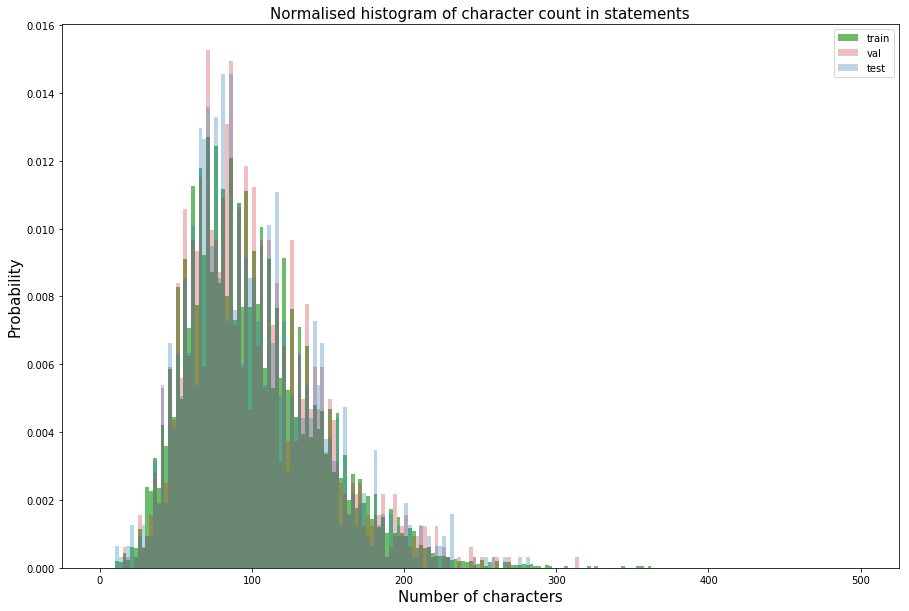

In [55]:
dist_train = train_statements.apply(len)
dist_val = val_statements.apply(len)
dist_test = test_statements.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 500], color=pal[2], density=True,alpha=0.7, label='train')
plt.hist(dist_val, bins=200, range=[0, 500], color=pal[3], density=True,alpha=0.3, label='val')
plt.hist(dist_test, bins=200, range=[0, 500], color=pal[0], density=True, alpha=0.3, label='test')
plt.title('Normalised histogram of character count in statements', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print(f'train_mean: {dist_train.mean()}, train_std: {dist_train.std()}, train_max: {dist_train.max()}\n',
      f'val_mean: {dist_val.mean()}, val_std: {dist_val.std()}, val_max: {dist_val.max()}\n',
      f'test_mean: {dist_test.mean()}, test_std: {dist_test.std()}, test_max: {dist_test.max()}')

train_mean: 406.41787109375, train_std: 285.9546232878548, train_max: 8196
 val_mean: 410.1277258566978, val_std: 229.94568651626247, val_max: 4039
 test_mean: 420.49013417521707, test_std: 319.5372599973299, test_max: 8884


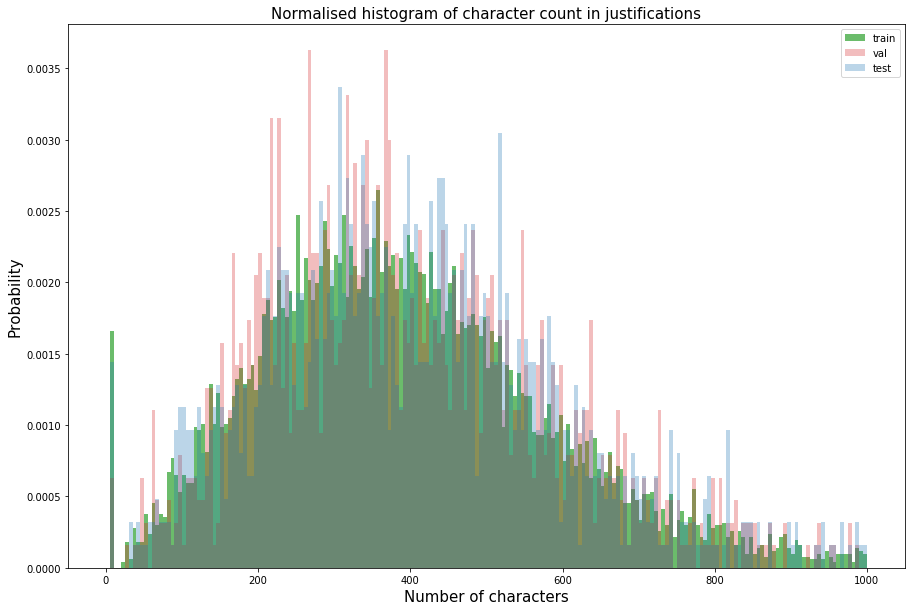

In [56]:
dist_train = train_justifications.apply(len)
dist_val = val_justifications.apply(len)
dist_test = test_justifications.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 1000], color=pal[2], density=True,alpha=0.7, label='train')
plt.hist(dist_val, bins=200, range=[0, 1000], color=pal[3], density=True,alpha=0.3, label='val')
plt.hist(dist_test, bins=200, range=[0, 1000], color=pal[0], density=True, alpha=0.3, label='test')
plt.title('Normalised histogram of character count in justifications', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print(f'train_mean: {dist_train.mean()}, train_std: {dist_train.std()}, train_max: {dist_train.max()}\n',
      f'val_mean: {dist_val.mean()}, val_std: {dist_val.std()}, val_max: {dist_val.max()}\n',
      f'test_mean: {dist_test.mean()}, test_std: {dist_test.std()}, test_max: {dist_test.max()}')

train_mean: 17.9701171875, train_std: 8.540527215780509, train_max: 302
 val_mean: 17.92601246105919, val_std: 7.701766212583798, val_max: 57
 test_mean: 18.235201262825573, test_std: 11.227361284331582, test_max: 283


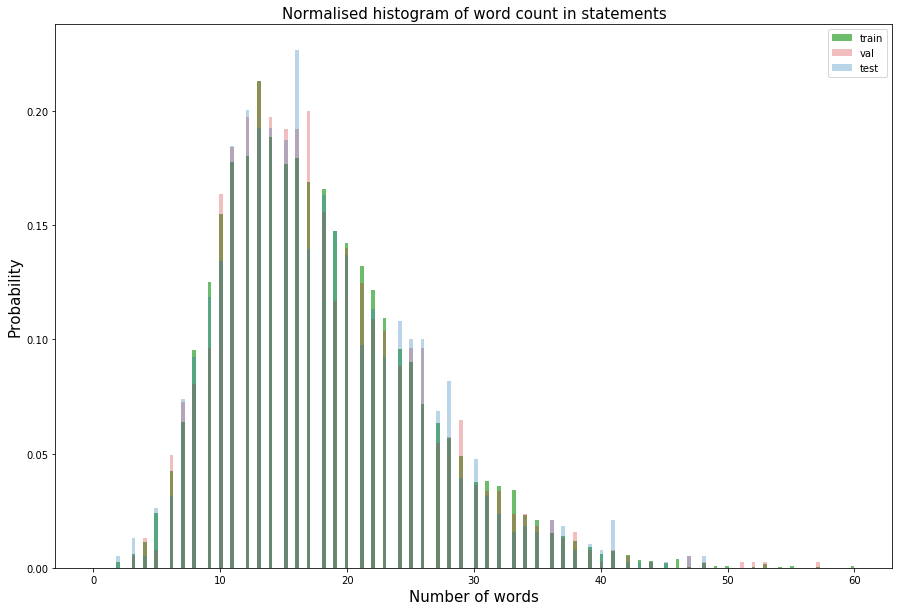

In [57]:
dist_train = train_statements.apply(lambda x: len(x.split(' ')))
dist_val = val_statements.apply(lambda x: len(x.split(' ')))
dist_test = test_statements.apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 60], color=pal[2], density=True,alpha=0.7, label='train')
plt.hist(dist_val, bins=200, range=[0, 60], color=pal[3], density=True,alpha=0.3, label='val')
plt.hist(dist_test, bins=200, range=[0, 60], color=pal[0], density=True, alpha=0.3, label='test')
plt.title('Normalised histogram of word count in statements', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print(f'train_mean: {dist_train.mean()}, train_std: {dist_train.std()}, train_max: {dist_train.max()}\n',
      f'val_mean: {dist_val.mean()}, val_std: {dist_val.std()}, val_max: {dist_val.max()}\n',
      f'test_mean: {dist_test.mean()}, test_std: {dist_test.std()}, test_max: {dist_test.max()}')

train_mean: 72.1037109375, train_std: 67.28023722625909, train_max: 3030
 val_mean: 72.38161993769471, val_std: 41.101769084160466, val_max: 721
 test_mean: 74.23441199684294, test_std: 61.95250805300473, test_max: 1834


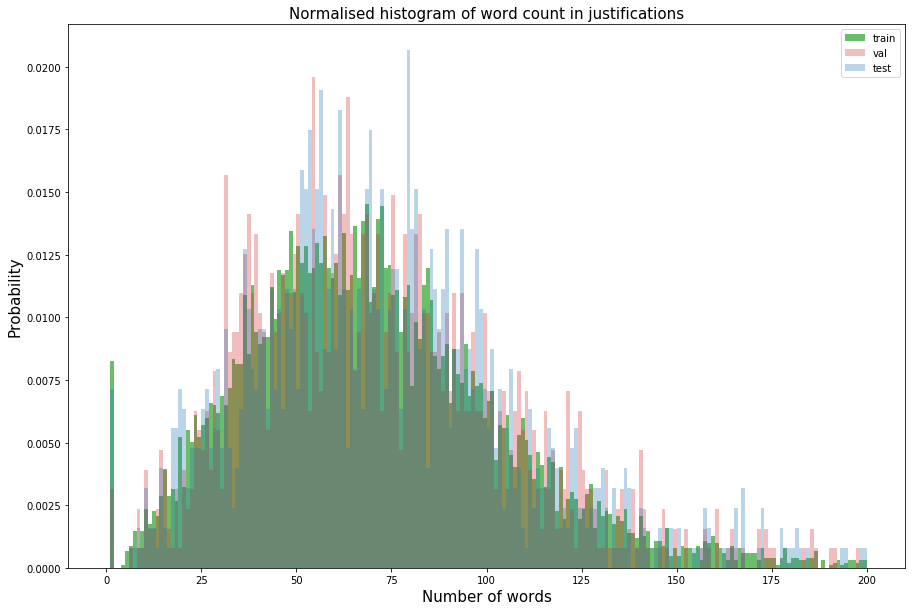

In [58]:
dist_train = train_justifications.apply(lambda x: len(x.split(' ')))
dist_val = val_justifications.apply(lambda x: len(x.split(' ')))
dist_test = test_justifications.apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], density=True,alpha=0.7, label='train')
plt.hist(dist_val, bins=200, range=[0, 200], color=pal[3], density=True,alpha=0.3, label='val')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[0], density=True, alpha=0.3, label='test')
plt.title('Normalised histogram of word count in justifications', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print(f'train_mean: {dist_train.mean()}, train_std: {dist_train.std()}, train_max: {dist_train.max()}\n',
      f'val_mean: {dist_val.mean()}, val_std: {dist_val.std()}, val_max: {dist_val.max()}\n',
      f'test_mean: {dist_test.mean()}, test_std: {dist_test.std()}, test_max: {dist_test.max()}')

In [59]:
id_cols = [col for col in list(train_df.columns) if col.endswith('_id')]
required_cols = ['label', 'binary_label', 'statement', 'justification'] + counts_cols + id_cols

mod_train = train_df[required_cols]
mod_val = val_df[required_cols]
mod_test = test_df[required_cols]

mod_train.to_csv('LIAR-PLUS/dataset/mod_train.csv', index=False)
mod_val.to_csv('LIAR-PLUS/dataset/mod_val.csv', index=False)
mod_test.to_csv('LIAR-PLUS/dataset/mod_test.csv', index=False)

In [60]:
pd.read_csv('LIAR-PLUS/dataset/mod_train.csv').head()

,label,binary_label,statement,justification,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_fire_counts,subject_list_id,speaker_id,speaker_job_title_id,state_id,party_id,context_id
0,1,False,say the annies list political group support th...,thats a premise that he fails to back up annie...,0.000000,0.008696,0.006211,0.000000,0.000000,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",10,7,0,0,7
1,2,True,when did the decline of coal start it started ...,surovell said the decline of coal started when...,0.000000,0.008696,0.006211,0.006135,0.000000,"0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1",10,8,7,1,7
2,3,True,hillary clinton agrees with john mccain by vot...,obama said he would have voted against the ame...,1.000000,0.626087,1.000000,0.993865,0.085714,"0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0",0,1,4,1,7
3,1,False,health care reform legislation is likely to ma...,the release may have a point that mikulskis co...,0.100000,0.165217,0.024845,0.030675,0.419048,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",10,8,15,2,0
4,2,True,the economic turnaround started at the end of ...,crist said that the economic turnaround starte...,0.214286,0.086957,0.124224,0.116564,0.019048,"0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0",10,8,1,1,7


In [61]:
mod_train.columns

Index(['label', 'binary_label', 'statement', 'justification',
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_fire_counts', 'subject_list_id',
       'speaker_id', 'speaker_job_title_id', 'state_id', 'party_id',
       'context_id'],
      dtype='object')

In [62]:
list(train_df.columns)

['id',
 'label',
 'binary_label',
 'statement',
 'subjects',
 'speaker',
 'speaker_job_title',
 'state',
 'party',
 'barely_true_counts',
 'false_counts',
 'half_true_counts',
 'mostly_true_counts',
 'pants_fire_counts',
 'context',
 'justification',
 'subject_list',
 'subject_list_id',
 'speaker_id',
 'speaker_job_title_id',
 'state_id',
 'party_id',
 'context_id',
 'statement_len_counts',
 'statement_char_counts']